Importo librerias a ultilizar


In [1]:
from IPython.core.display import display, HTML
display(HTML("<style>.container { width:90% !important; }</style>"))

In [63]:
import pandas as pd
import numpy  as np
import matplotlib.pyplot as plt
import seaborn as sbn
from datetime import datetime as dt

In [64]:
%matplotlib inline 

### ¿Existe relación entre el nivel de educación y el nivel laboral requerido en las postulaciones?

Para este análisis procedemos a cargar, inicialmente, en un dataframe los datos del nivel educativo de los postulantes.


In [65]:
educacion_postulantes = pd.read_csv('../datos_navent_fiuba/fiuba_1_postulantes_educacion.csv', low_memory=False)

Echamos un vistazo general de los datos:

In [66]:
educacion_postulantes.head()

,idpostulante,nombre,estado
0,NdJl,Posgrado,En Curso
1,8BkL,Universitario,En Curso
2,1d2B,Universitario,En Curso
3,NPBx,Universitario,En Curso
4,NPBx,Master,En Curso


In [67]:
educacion_postulantes.tail()

,idpostulante,nombre,estado
298226,GNZqARp,Terciario/Técnico,Abandonado
298227,ow2p8vk,Universitario,Abandonado
298228,6rPEvwv,Universitario,Abandonado
298229,vVja45X,Universitario,Abandonado
298230,1QPMbX3,Universitario,Abandonado


Nos preguntamos la dimension de este data frame:


In [68]:
educacion_postulantes.shape

(298231, 3)

Vemos si existe algun dato nulo

In [69]:
educacion_postulantes.isnull().any()

idpostulante    False
nombre          False
estado          False
dtype: bool

Como hemos obtuvimos False en cada columna podemos estar seguros de que tenemos la informacion completa en este data frame. Con lo cual no limpiamos nada. 

Ahora procedemos a obtener la información de las postulaciones:
    

In [70]:
postulaciones = pd.read_csv('../datos_navent_fiuba/fiuba_4_postulaciones.csv')

vemos alguno de los datos para saber la estructura de nuestro data frame

In [71]:
postulaciones.head()

,idaviso,idpostulante,fechapostulacion
0,1112257047,NM5M,2018-01-15 16:22:34
1,1111920714,NM5M,2018-02-06 09:04:50
2,1112346945,NM5M,2018-02-22 09:04:47
3,1112345547,NM5M,2018-02-22 09:04:59
4,1112237522,5awk,2018-01-25 18:55:03


Para el análisis propuesto creemos de importancia las columnas "idaviso" y "idpostulante" con lo cual procedemos a ver si estas poseen datos nulos para poder limpiarlos y tambien nos quedamos unicamente con esas columnas.

In [72]:
postulaciones.isnull().any()

idaviso             False
idpostulante        False
fechapostulacion    False
dtype: bool

Vemos que las columnas no tienen información nula.
Nos quedamos con las columnas de interes:

In [73]:
postulaciones = postulaciones[['idaviso','idpostulante']]

Vemos el tamaño de nuestro data frame:

In [74]:
postulaciones.shape

(3401623, 2)

Para saber el nivel laboral de las publicaciones a las cuales las personas se postulan procedemos a cargar los datos de los detalles de los avisos :

In [75]:
detalles_avisos = pd.read_csv('../datos_navent_fiuba/fiuba_6_avisos_detalle.csv')

Procedemos a dar un vistazo a este data frame:

In [76]:
detalles_avisos.head()

,idaviso,idpais,titulo,descripcion,nombre_zona,ciudad,mapacalle,tipo_de_trabajo,nivel_laboral,nombre_area,denominacion_empresa
0,8725750,1,VENDEDOR/A PROVINCIA DE SANTA FE,<p><strong><strong>Empresa:</strong></strong> ...,Gran Buenos Aires,NaN,NaN,Full-time,Senior / Semi-Senior,Comercial,VENTOR
1,17903700,1,Enfermeras,<p>Solicitamos para importante cadena de farma...,Gran Buenos Aires,NaN,NaN,Full-time,Senior / Semi-Senior,Salud,Farmacias Central Oeste
2,1000150677,1,Chofer de taxi,<p>TE GUSTA MANEJAR? QUERES GANAR PLATA HACIEN...,Capital Federal,NaN,Empedrado 2336,Full-time,Senior / Semi-Senior,Transporte,FAMITAX SRL
3,1000610287,1,CHOFER DE CAMIONETA BAHIA BLANCA - PUNTA ALTA,<p><strong>Somos una empresa multinacional que...,Gran Buenos Aires,NaN,NaN,Full-time,Senior / Semi-Senior,Transporte,Wurth Argentina S.A
4,1000872556,1,Operarios de Planta - Rubro Electrodomésticos,<p><strong>OPERARIOS DE PLANTA</strong></p><p>...,Gran Buenos Aires,NaN,NaN,Full-time,Senior / Semi-Senior,Producción,ELECTRO OUTLET SRL


Nos preguntamos si hay datos nulos:

In [77]:
detalles_avisos.isnull().any()

idaviso                 False
idpais                  False
titulo                  False
descripcion             False
nombre_zona             False
ciudad                   True
mapacalle                True
tipo_de_trabajo         False
nivel_laboral           False
nombre_area             False
denominacion_empresa     True
dtype: bool

Vemos que no hay nulos en el nivel laboral,nos quedamos solamente con las columnas de interes.

In [78]:
nivel_laboral = detalles_avisos[['idaviso','nivel_laboral','descripcion','nombre_area']]

In [79]:
nivel_laboral.head()

,idaviso,nivel_laboral,descripcion,nombre_area
0,8725750,Senior / Semi-Senior,<p><strong><strong>Empresa:</strong></strong> ...,Comercial
1,17903700,Senior / Semi-Senior,<p>Solicitamos para importante cadena de farma...,Salud
2,1000150677,Senior / Semi-Senior,<p>TE GUSTA MANEJAR? QUERES GANAR PLATA HACIEN...,Transporte
3,1000610287,Senior / Semi-Senior,<p><strong>Somos una empresa multinacional que...,Transporte
4,1000872556,Senior / Semi-Senior,<p><strong>OPERARIOS DE PLANTA</strong></p><p>...,Producción


In [80]:
nivel_laboral.shape

(13534, 4)

Para poder ver el nivel laboral de los avisos a los cuales las personas se postulan procedemos a unir el data frame que contiene las postulaciones con el del nivel laboral de ese aviso.

In [81]:
postulaciones_por_nivel = pd.merge(postulaciones, nivel_laboral, how='left', on= 'idaviso')

Le damos una mirada a nuestro nuevo data frame:

In [82]:
postulaciones_por_nivel.head()

,idaviso,idpostulante,nivel_laboral,descripcion,nombre_area
0,1112257047,NM5M,Otro,"<p><strong><em><span style="""">En </span></em><...",Atención al Cliente
1,1111920714,NM5M,Senior / Semi-Senior,<p>En Randstad Argentina nos encontramos en bú...,Telemarketing
2,1112346945,NM5M,Senior / Semi-Senior,"<p style="""">4 Finance, importante empresa fina...",Telemarketing
3,1112345547,NM5M,Senior / Semi-Senior,<p>En Randstad Argentina nos encontramos en bú...,Telemarketing
4,1112237522,5awk,Senior / Semi-Senior,<p>Para Empresa Pyme ubicada en zona de Barrac...,Contabilidad


Vemos si hay campos nulos luego del merge, debidos a que no contemos con la informacion del nivel requerido para las postulaciones que hayan realizado los aspitantes.

In [83]:
postulaciones_por_nivel.isnull().any()

idaviso          False
idpostulante     False
nivel_laboral     True
descripcion       True
nombre_area       True
dtype: bool

Vemos que hay postulaciones en las cuales el nivel laboral no era dato, nos preguntamos cuantas son:

In [84]:
postulaciones_por_nivel.isnull().sum()

idaviso               0
idpostulante          0
nivel_laboral    327417
descripcion      327417
nombre_area      327417
dtype: int64

Vemos que son pocas las publicaciones que no tienen información del nivel laboral requerido, en comparacion con la cantidad total de postulaciones. 

Para poder ver la relacion entre las postulaciones y la educación realizamos un merge con el data frame educacion_postulantes:

In [85]:
 postulaciones_edu_niv = pd.merge(educacion_postulantes, postulaciones_por_nivel, how='left',on='idpostulante')

Vemos los datos nulos:

In [86]:
postulaciones_edu_niv.isnull().any()

idpostulante     False
nombre           False
estado           False
idaviso          False
nivel_laboral     True
descripcion       True
nombre_area       True
dtype: bool

Cambiamos el nombre de la columna "nombre" para que sea mas significativo:

In [87]:
postulaciones_edu_niv.rename(columns={'nombre': 'nivel_educacion'}, inplace = True) 

In [88]:
postulaciones_edu_niv

,idpostulante,nivel_educacion,estado,idaviso,nivel_laboral,descripcion,nombre_area
0,NdJl,Posgrado,En Curso,1112261212,Jefe / Supervisor / Responsable,<p>Nos encontramos en la búsqueda de un<strong...,Administración
1,NdJl,Posgrado,En Curso,1112273308,Jefe / Supervisor / Responsable,"<p style=""""><span style="""">Nos encontramos en ...",Finanzas
2,NdJl,Posgrado,En Curso,1112281548,Gerencia / Alta Gerencia / Dirección,<p>Importante empresa de Diagnóstico por Imáge...,Planeamiento económico-financiero
3,NdJl,Posgrado,En Curso,1112260409,Senior / Semi-Senior,<p>En <strong>New Talent</strong> buscamos par...,Control de Gestión
4,NdJl,Posgrado,En Curso,1112293547,NaN,NaN,NaN
5,NdJl,Posgrado,En Curso,1112287915,NaN,NaN,NaN
6,NdJl,Posgrado,En Curso,1112303880,Jefe / Supervisor / Responsable,<p>La busqueda esta orientada a personal con a...,Tesorería
7,NdJl,Posgrado,En Curso,1112304011,Senior / Semi-Senior,<p>Empresa de Gerenciamiento de Proyectos de C...,Administración
8,NdJl,Posgrado,En Curso,1112302347,Jefe / Supervisor / Responsable,<p>Empresa de telecomunicaciones incorporará a...,Impuestos
9,NdJl,Posgrado,En Curso,1112308241,Jefe / Supervisor / Responsable,"<div style=""""><p align=""center"" style=""""><stro...",Administración


Vemos cuales son los diferentes niveles de educación que tienen los postulantes:

In [89]:
postulaciones_edu_niv['nivel_educacion'].value_counts()

Secundario           2060789
Universitario        1916208
Terciario/Técnico     864464
Otro                  508217
Posgrado              116924
Master                 58514
Doctorado               3552
Name: nivel_educacion, dtype: int64

Como puede suceder que un mismo postulante tenga mas de un nivel educativo, procedemos a eliminar los duplicados:

In [90]:
def filtroDeRepetidos(df):
    #si hay mas de un estado :Abandonad>Graduado>En Curso
    dft1 = df[df["estado"]=="Abandonado"]
    dft2 = df[df["estado"]=="Graduado"]
    dft3 = df[df["estado"]=="En Curso"]
    df = pd.concat([dft1,dft2[~dft2["idpostulante"].isin(dft1["idpostulante"])]])
    df = pd.concat([df,dft3[~dft3["idpostulante"].isin(df["idpostulante"])]])
    return df
#aislo cada caso
Sec = postulaciones_edu_niv.loc[postulaciones_edu_niv['nivel_educacion']=="Secundario"]
Uni = postulaciones_edu_niv.loc[postulaciones_edu_niv['nivel_educacion']=="Universitario"]
Ter = postulaciones_edu_niv.loc[postulaciones_edu_niv['nivel_educacion']=="Terciario/Técnico"]
Pos = postulaciones_edu_niv.loc[postulaciones_edu_niv['nivel_educacion']=="Posgrado"]
Mas = postulaciones_edu_niv.loc[postulaciones_edu_niv['nivel_educacion']=="Master"]
Doc = postulaciones_edu_niv.loc[postulaciones_edu_niv['nivel_educacion']=="Doctorado"]

Sec = filtroDeRepetidos(Sec)
Uni = filtroDeRepetidos(Uni)
Ter = filtroDeRepetidos(Ter)
Pos = filtroDeRepetidos(Pos)
Mas = filtroDeRepetidos(Mas)
Doc = filtroDeRepetidos(Doc)
#me quedo con el mas grande, doc>master>posgrado...
Doc = pd.concat([Doc,Mas[~Mas["idpostulante"].isin(Doc["idpostulante"])]])
Doc = pd.concat([Doc,Pos[~Pos["idpostulante"].isin(Doc["idpostulante"])]])
Doc = pd.concat([Doc,Uni[~Uni["idpostulante"].isin(Doc["idpostulante"])]])
Doc = pd.concat([Doc,Ter[~Ter["idpostulante"].isin(Doc["idpostulante"])]])
Doc = pd.concat([Doc,Sec[~Sec["idpostulante"].isin(Doc["idpostulante"])]])
postulaciones_edu_niv = Doc
# todos los id son unicos
postulaciones_edu_niv.nunique()


idpostulante       187414
nivel_educacion         6
estado                  3
idaviso             12686
nivel_laboral           5
descripcion         10597
nombre_area           162
dtype: int64

In [31]:
postulaciones_edu_niv.to_csv('educacionNivelLaboral.csv')

In [2]:
import pandas as pd

In [4]:
postulaciones_edu_niv = pd.read_csv('../datos_navent_fiuba/educacionNivelLaboral.csv')

Nos preguntamos cuantas postulaciones hay de cada nivel educativo:

In [91]:
postulaciones_por_educacion = postulaciones_edu_niv['nivel_educacion'].value_counts().reset_index(name='cantidad')
postulaciones_por_educacion

,index,cantidad
0,Universitario,1621277
1,Secundario,1052738
2,Terciario/Técnico,453002
3,Posgrado,95941
4,Master,56147
5,Doctorado,3517


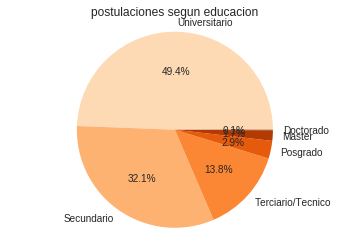

In [93]:
grafico_postulaciones_por_educacion = postulaciones_por_educacion['cantidad']
labels = ['Universitario','Secundario','Terciario/Tecnico','Posgrado','Master','Doctorado']
colors = plt.cm.Oranges(np.linspace(0.2, 1, 6))
plt.pie(grafico_postulaciones_por_educacion, labels=labels, autopct='%.1f%%', colors = colors)
plt.axis('equal')
plt.title('postulaciones segun educacion')

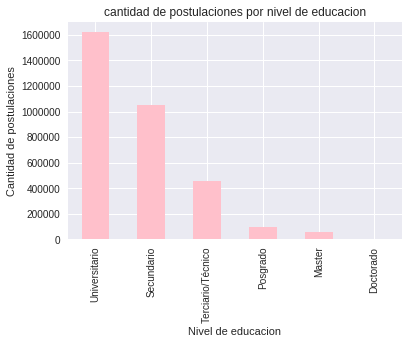

In [6]:
postulaciones_por_nivel_de_educacion = postulaciones_edu_niv['nivel_educacion'].value_counts().plot(kind='bar',color='pink', title="cantidad de postulaciones por nivel de educacion")
postulaciones_por_nivel_de_educacion.set_xlabel('Nivel de educacion')
postulaciones_por_nivel_de_educacion.set_ylabel('Cantidad de postulaciones')

En primer instancia vemos que los principales postulantes tienen un nivel de estudio universitario. Nos preguntamos en que estado esta ese estudio:

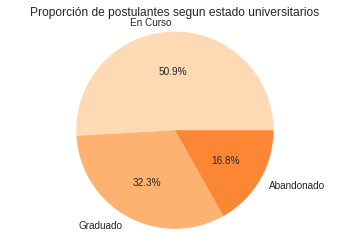

In [110]:
estados_universitarios = postulaciones_edu_niv[postulaciones_edu_niv['nivel_educacion']=='Universitario']['estado'].value_counts().reset_index(name='cantidad')
grafico_postulaciones_universitario = estados_universitarios['cantidad']
colors = plt.cm.Oranges(np.linspace(0.2, 1, 6))
labels = estados_universitarios['index']
plt.pie(grafico_postulaciones_universitarios, autopct='%.1f%%',labels=labels, colors = colors)
plt.axis('equal')
plt.title('Proporción de postulantes segun estado universitarios')

Vemos que en su mayoria los postulantes universitarios son estudiantes.

Seguimos el mismo analisis para el resto de los niveles de educacion.


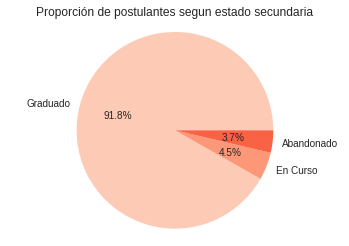

In [109]:
estados_secundaria = postulaciones_edu_niv[postulaciones_edu_niv['nivel_educacion']=='Secundario']['estado'].value_counts().reset_index(name='cantidad')
grafico_postulaciones_secundaria = estados_secundaria['cantidad']
colors = plt.cm.Reds(np.linspace(0.2, 1, 6))
labels = estados_secundaria['index']
plt.pie(grafico_postulaciones_secundaria, autopct='%.1f%%',labels=labels, colors = colors)
plt.axis('equal')
plt.title('Proporción de postulantes segun estado secundaria')

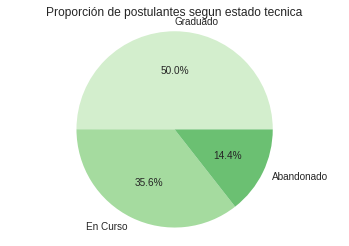

In [114]:
estados_tecnica = postulaciones_edu_niv[postulaciones_edu_niv['nivel_educacion']=='Terciario/Técnico']['estado'].value_counts().reset_index(name='cantidad')
grafico_postulaciones_tecnica = estados_tecnica['cantidad']
colors = plt.cm.Greens(np.linspace(0.2, 1, 6))
labels = estados_tecnica['index']
plt.pie(grafico_postulaciones_tecnica, autopct='%.1f%%',labels=labels, colors = colors)
plt.axis('equal')
plt.title('Proporción de postulantes segun estado tecnica')

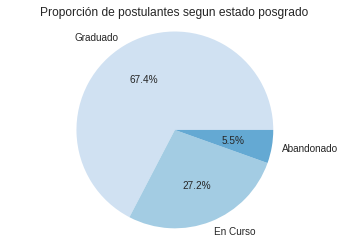

In [116]:
estados_posgrado = postulaciones_edu_niv[postulaciones_edu_niv['nivel_educacion']=='Posgrado']['estado'].value_counts().reset_index(name='cantidad')
grafico_postulaciones_posgrado = estados_posgrado['cantidad']
colors = plt.cm.Blues(np.linspace(0.2, 1, 6))
labels = estados_posgrado['index']
plt.pie(grafico_postulaciones_posgrado, autopct='%.1f%%',labels=labels, colors = colors)
plt.axis('equal')
plt.title('Proporción de postulantes segun estado posgrado')

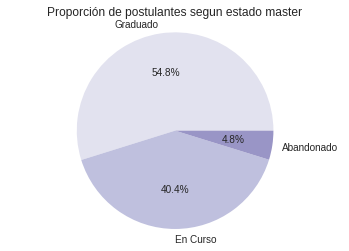

In [117]:
estados_master = postulaciones_edu_niv[postulaciones_edu_niv['nivel_educacion']=='Master']['estado'].value_counts().reset_index(name='cantidad')
grafico_postulaciones_master = estados_master['cantidad']
colors = plt.cm.Purples(np.linspace(0.2, 1, 6))
labels = estados_master['index']
plt.pie(grafico_postulaciones_master, autopct='%.1f%%',labels=labels, colors = colors)
plt.axis('equal')
plt.title('Proporción de postulantes segun estado master')

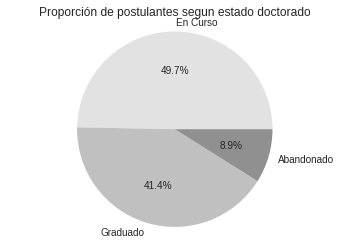

In [121]:
estados_doctorado = postulaciones_edu_niv[postulaciones_edu_niv['nivel_educacion']=='Doctorado']['estado'].value_counts().reset_index(name='cantidad')
grafico_postulaciones_doctorado = estados_doctorado['cantidad']
colors = plt.cm.Greys(np.linspace(0.2, 1, 6))
labels = estados_doctorado['index']
plt.pie(grafico_postulaciones_doctorado, autopct='%.1f%%',labels=labels, colors = colors)
plt.axis('equal')
plt.title('Proporción de postulantes segun estado doctorado')

Nos preguntamos que niveles laborales se ofrecen:

In [13]:
postulaciones_edu_niv['nivel_laboral'].value_counts()

Senior / Semi-Senior                    1947614
Junior                                   670864
Otro                                     245877
Jefe / Supervisor / Responsable           82660
Gerencia / Alta Gerencia / Dirección      23286
Name: nivel_laboral, dtype: int64

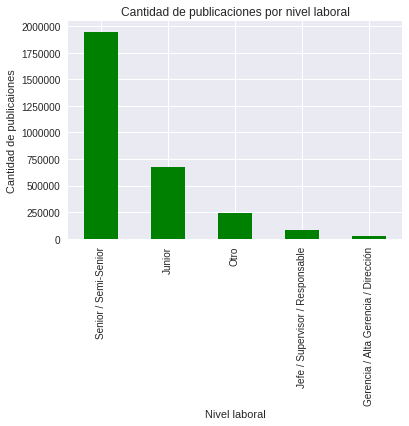

In [14]:
publicacionesVsNivelLaboral = postulaciones_edu_niv['nivel_laboral'].value_counts().plot(kind='bar',color='green', title='Cantidad de publicaciones por nivel laboral')
publicacionesVsNivelLaboral.set_xlabel('Nivel laboral')
publicacionesVsNivelLaboral.set_ylabel('Cantidad de publicaiones')

Vemos que hay mayor postulaciones a puestps de Senior o Semi-Senior

Nos preguntamos si las postulaciones a los cargos de mayor jerarquia se dan para personas con mayor nivel educativo, para ello procedemos a agrupar por nivel_laboral:

In [15]:
postulaciones_por_nivel_laboral = postulaciones_edu_niv.groupby('nivel_laboral')

In [16]:
postulaciones_para_senior = postulaciones_por_nivel_laboral.get_group('Senior / Semi-Senior')['nivel_educacion'].value_counts().reset_index(name='cantidad')
postulaciones_para_senior.set_index('index')

,cantidad
index,
Universitario,955902
Secundario,624692
Terciario/Técnico,271672
Posgrado,58949
Master,34240
Doctorado,2159


Para poder comparar las postulaciones de las personas segun su nivel educativo procedemos a dividir la cantidad de postulaciones por la cantidad total de pesonas para cada nivel, de maner de comparar asi las proporciones.

In [17]:
postulaciones_para_senior['cantidad'] = postulaciones_para_senior['cantidad']/postulaciones_por_educacion['cantidad']
postulaciones_para_senior = postulaciones_para_senior.set_index('index')
postulaciones_para_senior

,cantidad
index,
Universitario,0.589598
Secundario,0.593397
Terciario/Técnico,0.599715
Posgrado,0.614430
Master,0.609828
Doctorado,0.613875


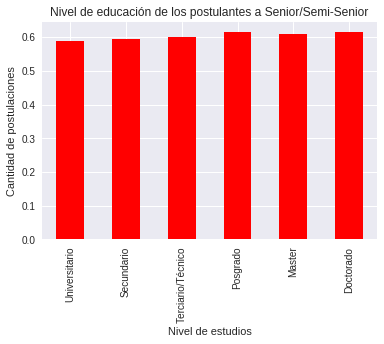

In [18]:
plot_postulaciones_para_senior = postulaciones_para_senior['cantidad'].plot(kind='bar', title = "Nivel de educación de los postulantes a Senior/Semi-Senior", color = 'red')
plot_postulaciones_para_senior.set_xlabel('Nivel de estudios')
plot_postulaciones_para_senior.set_ylabel('Cantidad de postulaciones')



Vemos que en proporcion a la cantidad de postulados segun su nivel de educacion, es  pareja la tendencia a postularse a puesto de Senio o Semi Senior.

Debido a esta paridad, nos preguntamos si hay una distincion en las areas en las cuales eligen este nivel laboral.

In [19]:
postulaciones_a_Senior = postulaciones_por_nivel_laboral.get_group('Senior / Semi-Senior')

In [54]:
postulaciones_a_Senior.head()

,Unnamed: 0,idpostulante,nivel_educacion,estado,idaviso,nivel_laboral,descripcion,nombre_area
0,124177,ek6m5r,Doctorado,Abandonado,1112301227,Senior / Semi-Senior,"<p>Nuestro cliente, empresa dedicada a la expl...",Ingeniería Oficina Técnica / Proyecto
1,124178,ek6m5r,Doctorado,Abandonado,1112297071,Senior / Semi-Senior,<p>Nos encontramos en la búsqueda de Responsab...,Ventas
2,124179,ek6m5r,Doctorado,Abandonado,1112289827,Senior / Semi-Senior,"<p style="""">Importante empresa con 70 años de ...",Ingeniería Química
3,124180,ek6m5r,Doctorado,Abandonado,1112316523,Senior / Semi-Senior,<p>Cervecería y Maltería Quilmes es una de las...,Ingeniería Química
4,124181,ek6m5r,Doctorado,Abandonado,1112339723,Senior / Semi-Senior,<p><strong>Compañía Multinacional Líder en el ...,Ingeniería de Procesos


In [21]:
niveles_educativos_para_Senior = postulaciones_a_Senior.groupby('nivel_educacion')

In [58]:
def areasPorNivelEducativoParaSenior(nivelEducativo):
    df = niveles_educativos_para_Senior.get_group(nivelEducativo)
    dfArea = df['nombre_area'].value_counts().reset_index(name='cantidad')
    dfArea = dfArea.set_index('index')
    return dfArea

In [60]:
areas_secundaria_senior = areasPorNivelEducativoParaSenior('Secundario')
areas_secundaria_senior.head()

,cantidad
index,
Producción,128679
Ventas,115449
Comercial,37566
Atención al Cliente,33913
Administración,31563


Vemos cuales son las areas principales:

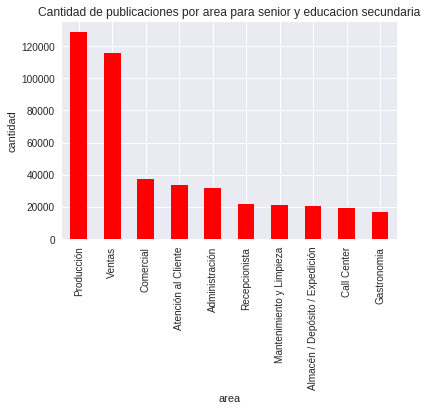

In [24]:
plot_area_secundaria_senior = areas_secundaria_senior.head(10)['cantidad'].plot(kind ='bar', color='red', title="Cantidad de publicaciones por area para senior y educacion secundaria")
plot_area_secundaria_senior.set_xlabel('area')
plot_area_secundaria_senior.set_ylabel('cantidad')

Como podemos ver la principal area a la cual los que tinen nivel secundario son esas 10, teniendo como principal a la Producción y Venta

Analizamos ahora a que areas se postulan los universitarios, para ver si coinciden con los de secundario:

In [25]:
areas_universitario_senior = areasPorNivelEducativoParaSenior('Universitario')
areas_universitario_senior.head()

,cantidad
index,
Ventas,122359
Administración,106096
Comercial,82294
Atención al Cliente,51188
Recepcionista,47304


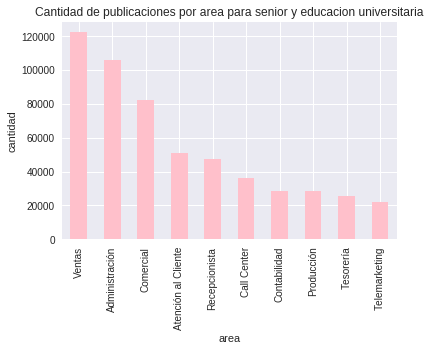

In [26]:
plot_area_universitario_senior = areas_universitario_senior.head(10)['cantidad'].plot(kind ='bar', color='pink', title="Cantidad de publicaciones por area para senior y educacion universitaria")
plot_area_universitario_senior.set_xlabel('area')
plot_area_universitario_senior.set_ylabel('cantidad')

In [27]:
areas_universitario_senior = areasPorNivelEducativoParaSenior('Universitario')
areas_universitario_senior.head()

,cantidad
index,
Ventas,122359
Administración,106096
Comercial,82294
Atención al Cliente,51188
Recepcionista,47304


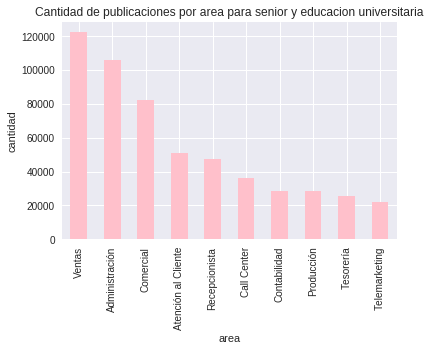

In [28]:
plot_area_universitario_senior = areas_universitario_senior.head(10)['cantidad'].plot(kind ='bar', color='pink', title="Cantidad de publicaciones por area para senior y educacion universitaria")
plot_area_universitario_senior.set_xlabel('area')
plot_area_universitario_senior.set_ylabel('cantidad')

In [37]:
areas_terciario_senior = areasPorNivelEducativoParaSenior('Terciario/Técnico')
areas_terciario_senior.head()

,cantidad
index,
Ventas,47186
Administración,25835
Comercial,22183
Atención al Cliente,18115
Producción,17402


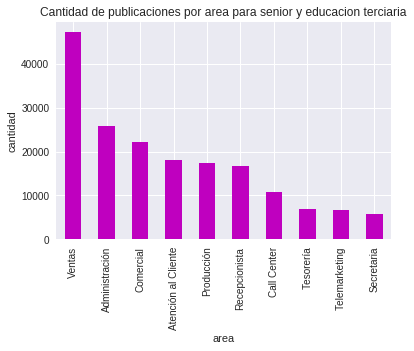

In [39]:
plot_area_terciario_senior = areas_terciario_senior.head(10)['cantidad'].plot(kind ='bar', color='m', title="Cantidad de publicaciones por area para senior y educacion terciaria")
plot_area_terciario_senior.set_xlabel('area')
plot_area_terciario_senior.set_ylabel('cantidad')

In [40]:
areas_posgrado_senior = areasPorNivelEducativoParaSenior('Posgrado')
areas_posgrado_senior.head()

,cantidad
index,
Ventas,4744
Comercial,4412
Administración,4396
Recursos Humanos,2383
Producción,2261


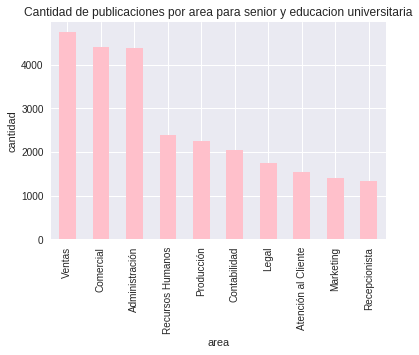

In [41]:
plot_area_posgrado_senior = areas_posgrado_senior.head(10)['cantidad'].plot(kind ='bar', color='pink', title="Cantidad de publicaciones por area para senior y educacion universitaria")
plot_area_posgrado_senior.set_xlabel('area')
plot_area_posgrado_senior.set_ylabel('cantidad')

In [42]:
areas_master_senior = areasPorNivelEducativoParaSenior('Master')
areas_master_senior.head()

,cantidad
index,
Comercial,2538
Ventas,2495
Administración,2034
Recursos Humanos,1458
Producción,1437


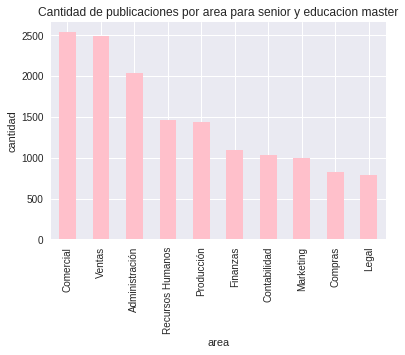

In [44]:
plot_area_master_senior = areas_master_senior.head(10)['cantidad'].plot(kind ='bar', color='pink', title="Cantidad de publicaciones por area para senior y educacion master")
plot_area_master_senior.set_xlabel('area')
plot_area_master_senior.set_ylabel('cantidad')

In [45]:
areas_doctorado_senior = areasPorNivelEducativoParaSenior('Doctorado')
areas_doctorado_senior.head()

,cantidad
index,
Administración,174
Ventas,165
Comercial,157
Atención al Cliente,109
Producción,85


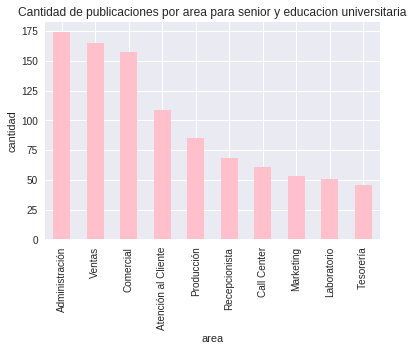

In [46]:
plot_area_doctorado_senior = areas_doctorado_senior.head(10)['cantidad'].plot(kind ='bar', color='pink', title="Cantidad de publicaciones por area para senior y educacion universitaria")
plot_area_doctorado_senior.set_xlabel('area')
plot_area_doctorado_senior.set_ylabel('cantidad')

In [ ]:
Vemos que si bien para el nivel senior la distribucion de elecciones parecida segun el nivel de estudio alcanzado, existe diferenciacion en las areas a las cuales se postulan, teniendo en comun princialemnte las areas de adminit


Seguimos para las otros niveles laboral, para ello definimos una funcion que se encargue de normalizarl los valores de las cantidad de postulaciones, de manera de comparar proporciones.

In [53]:
def obtener_cantidad_publicaciones(df):
    postulaciones_para_nivel = df['nivel_educacion'].value_counts().reset_index(name='cantidad')
    postulaciones_para_nivel['cantidad'] = postulaciones_para_nivel['cantidad']/postulaciones_por_educacion['cantidad']
    postulaciones_para_nivel = postulaciones_para_nivel.set_index('index')
    return postulaciones_para_nivel


In [54]:
postulaciones_para_Junior = obtener_cantidad_publicaciones(postulaciones_por_nivel_laboral.get_group('Junior'))

In [55]:
postulaciones_para_Junior

,cantidad
index,
Universitario,0.222940
Secundario,0.184155
Terciario/Técnico,0.203847
Posgrado,0.156555
Master,0.136321
Doctorado,0.151265


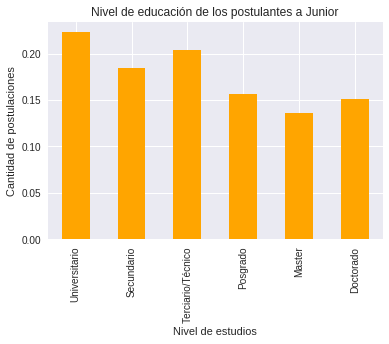

In [56]:
plot_postulaciones_para_Junior = postulaciones_para_Junior['cantidad'].plot(kind='bar', title = "Nivel de educación de los postulantes a Junior", color = 'orange')
plot_postulaciones_para_Junior.set_xlabel('Nivel de estudios')
plot_postulaciones_para_Junior.set_ylabel('Cantidad de postulaciones')



En este caso, las proporciones son un poco mas diversas,aunque con no mucha diferencia. Siendo losde mayor concurrencia postularse como Junior los universitarios y de estudio terciario.

Se repite el mismo estudio para Jefe:

In [59]:
postulaciones_para_jefe = obtener_cantidad_publicaciones(postulaciones_por_nivel_laboral.get_group('Jefe / Supervisor / Responsable'))
postulaciones_para_jefe

,cantidad
index,
Universitario,0.029912
Secundario,0.013149
Terciario/Técnico,0.019640
Posgrado,0.068553
Master,0.081447
Doctorado,0.078192


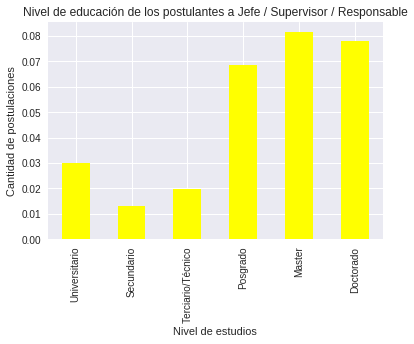

In [61]:
plot_postulaciones_para_Jefe = postulaciones_para_jefe['cantidad'].plot(kind='bar', title = "Nivel de educación de los postulantes a Jefe / Supervisor / Responsable", color = 'yellow')
plot_postulaciones_para_Jefe.set_xlabel('Nivel de estudios')
plot_postulaciones_para_Jefe.set_ylabel('Cantidad de postulaciones')



Vemos que en este caso las proporciones entre el nivel educativo cambian siginificativamnete, siendo aquellos con un nivel alto de estudio los principales postulantes.

Estudiamos para Gerencia:

In [62]:
postulaciones_para_gerencia = obtener_cantidad_publicaciones(postulaciones_por_nivel_laboral.get_group('Gerencia / Alta Gerencia / Dirección'))
postulaciones_para_gerencia

,cantidad
index,
Universitario,0.008116
Posgrado,0.002573
Secundario,0.005940
Master,0.025933
Terciario/Técnico,0.038114
Doctorado,0.028433


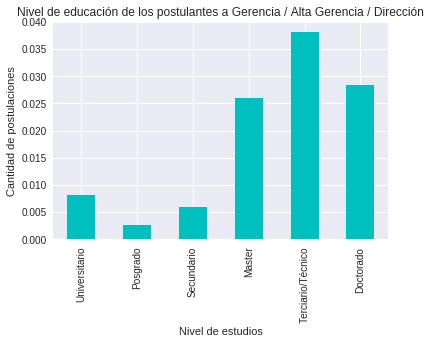

In [64]:
plot_postulaciones_para_gerencia = postulaciones_para_gerencia['cantidad'].plot(kind='bar', title = "Nivel de educación de los postulantes a Gerencia / Alta Gerencia / Dirección", color = 'c')
plot_postulaciones_para_gerencia.set_xlabel('Nivel de estudios')
plot_postulaciones_para_gerencia.set_ylabel('Cantidad de postulaciones')


Para puestos Gerenciales observamos que con mayor frecuencia son los de educacion terciaria o tecnica, doctorado o master.

Vemos para el resto de las publicaciones:

In [66]:
otras_postulaciones = obtener_cantidad_publicaciones(postulaciones_por_nivel_laboral.get_group('Otro'))
otras_postulaciones

,cantidad
index,
Secundario,0.064320
Universitario,0.094219
Terciario/Técnico,0.079187
Posgrado,0.045080
Master,0.036547
Doctorado,0.045493


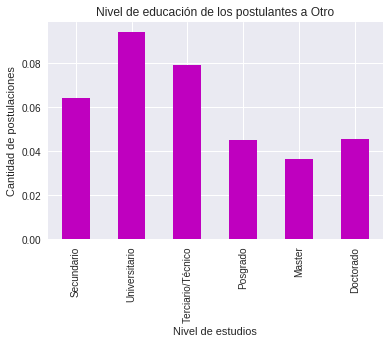

In [67]:
plot_postulaciones_para_otro = otras_postulaciones['cantidad'].plot(kind='bar', title = "Nivel de educación de los postulantes a Otro", color = 'm')
plot_postulaciones_para_otro.set_xlabel('Nivel de estudios')
plot_postulaciones_para_otro.set_ylabel('Cantidad de postulaciones')


Para ofertas cuyos niveles laborales no se especifican se puede ver que los de estudios universitarios son los mas propensos a postularse.